In [2]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

In [3]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [4]:
# Our first model
def fresh_model_1():
    model_1 = Sequential()
    model_1.add(Dense(units=256, activation='relu', input_shape=(mnist_image_size,)))
    model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_1

# Our second model:
def fresh_model_2():
    model_2 = Sequential()
    model_2.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_2

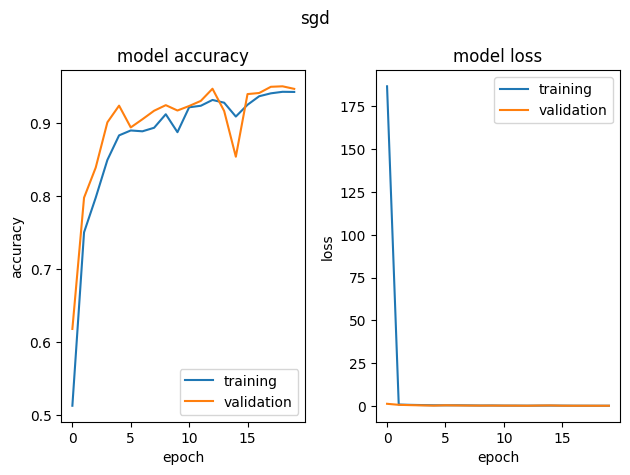

Trained in 27.156267 seconds
Test loss: 0.265
Test accuracy: 0.938


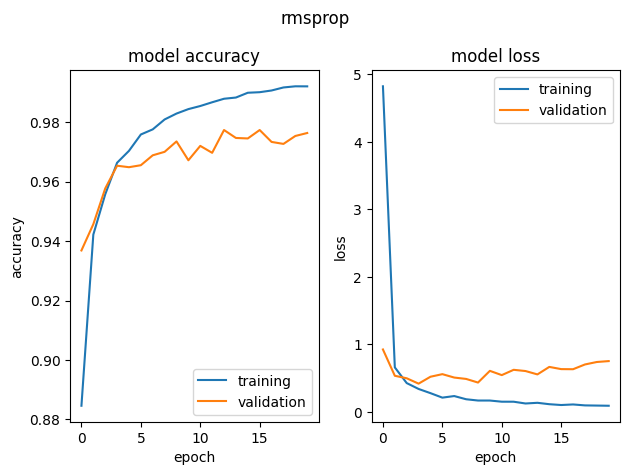

Trained in 40.98173 seconds
Test loss: 0.869
Test accuracy: 0.974


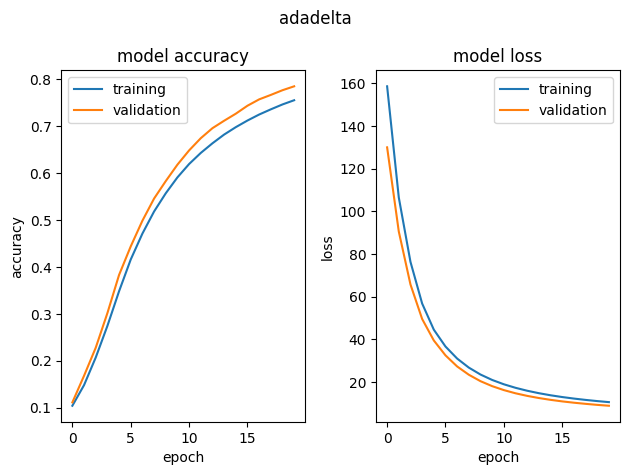

Trained in 34.35021499999999 seconds
Test loss: 9.42
Test accuracy: 0.772


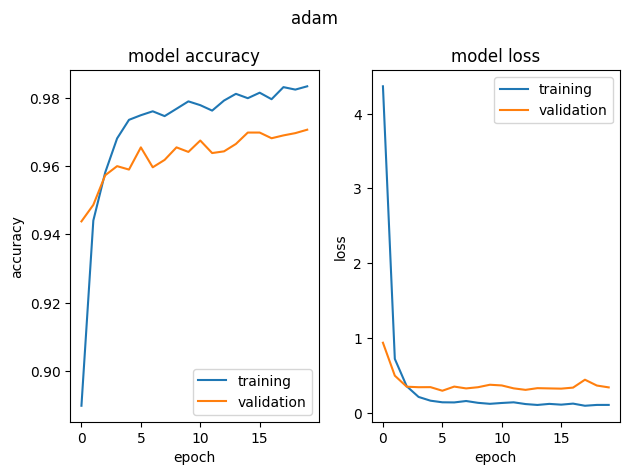

Trained in 29.971473000000017 seconds
Test loss: 0.413
Test accuracy: 0.967


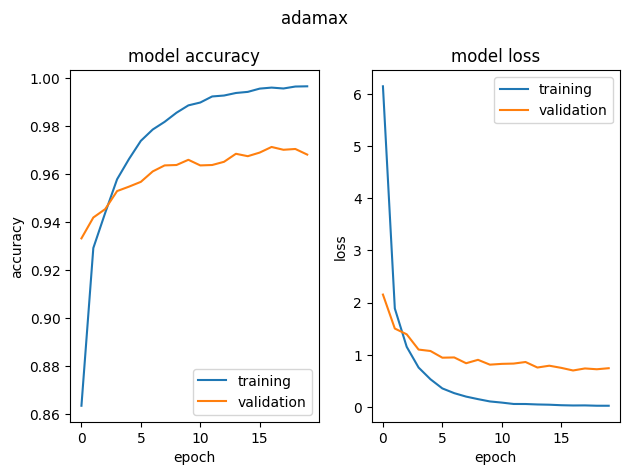

Trained in 32.103489999999994 seconds
Test loss: 0.744
Test accuracy: 0.967


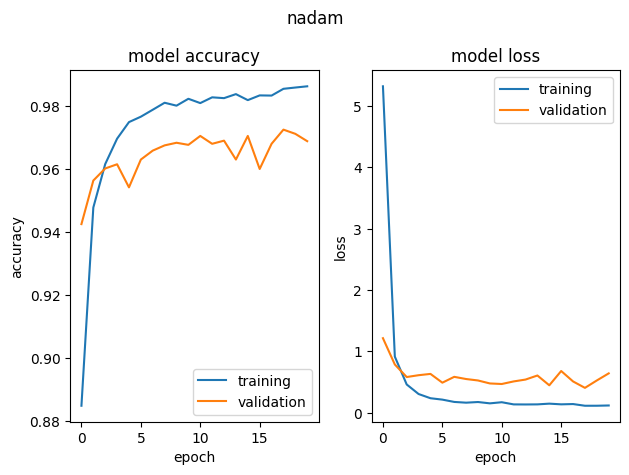

Trained in 54.68419499999999 seconds
Test loss: 0.707
Test accuracy: 0.965


In [5]:
import time # Because we care about the speed of these optimizers too!

optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = fresh_model_1()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

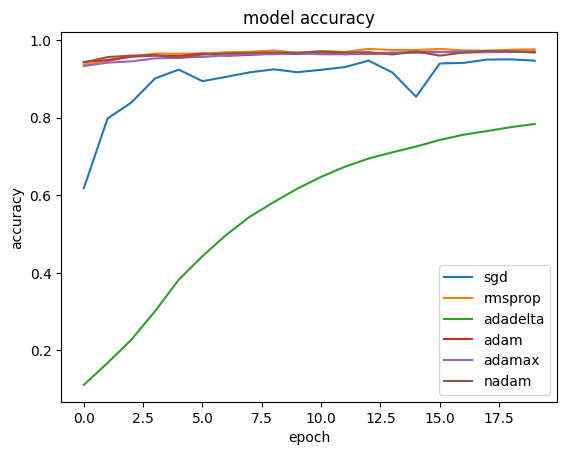

In [6]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

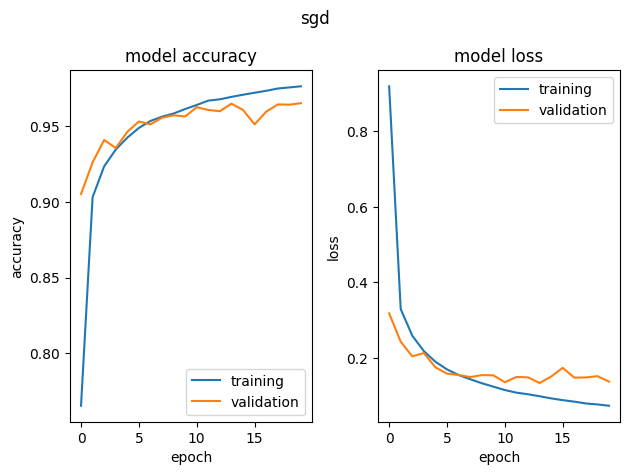

Trained in 13.700830999999994 seconds
Test loss: 0.156
Test accuracy: 0.957


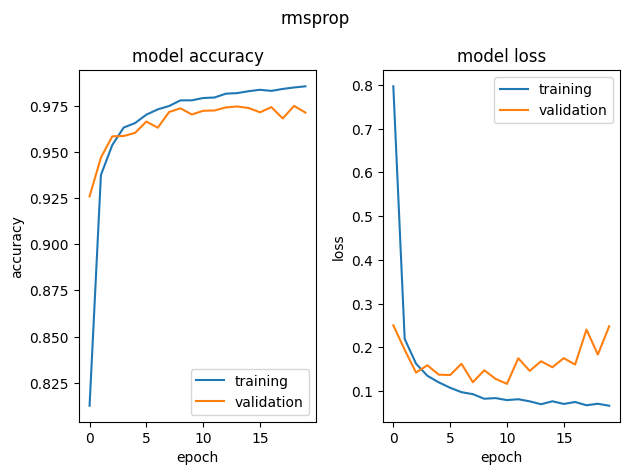

Trained in 15.554479999999984 seconds
Test loss: 0.272
Test accuracy: 0.969


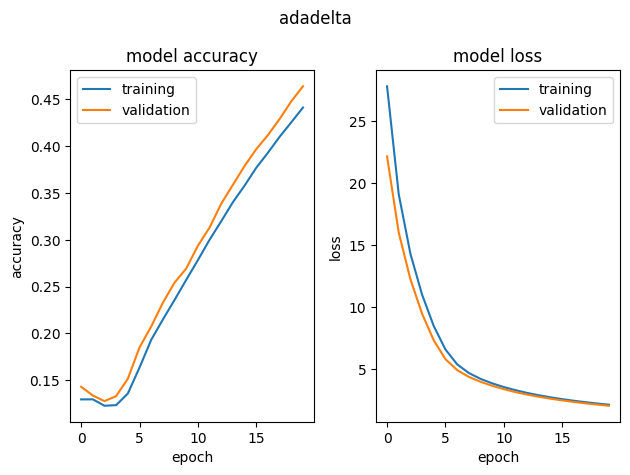

Trained in 17.789603 seconds
Test loss: 2.05
Test accuracy: 0.45


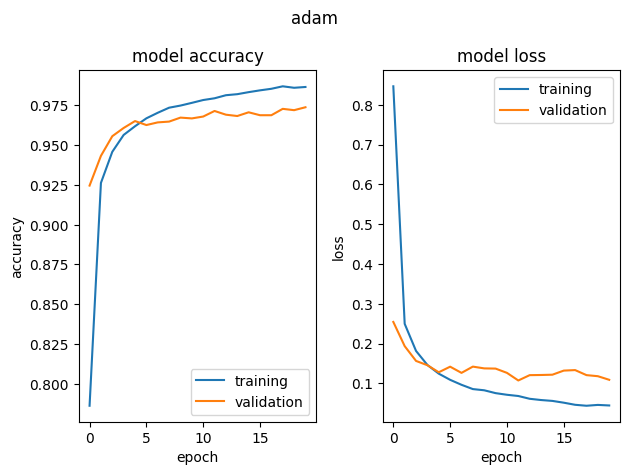

Trained in 22.37425300000001 seconds
Test loss: 0.139
Test accuracy: 0.969


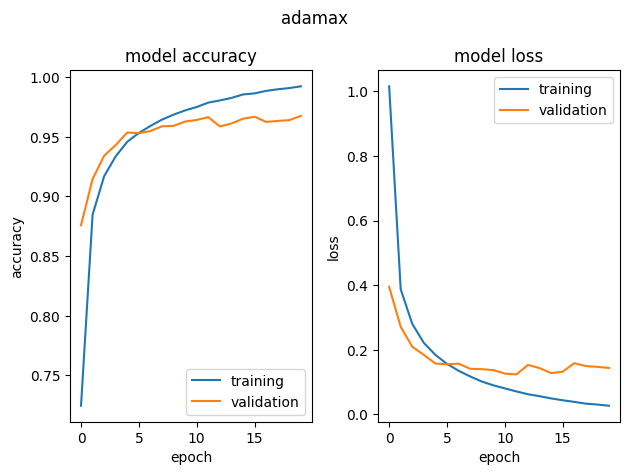

Trained in 16.055833000000007 seconds
Test loss: 0.19
Test accuracy: 0.961


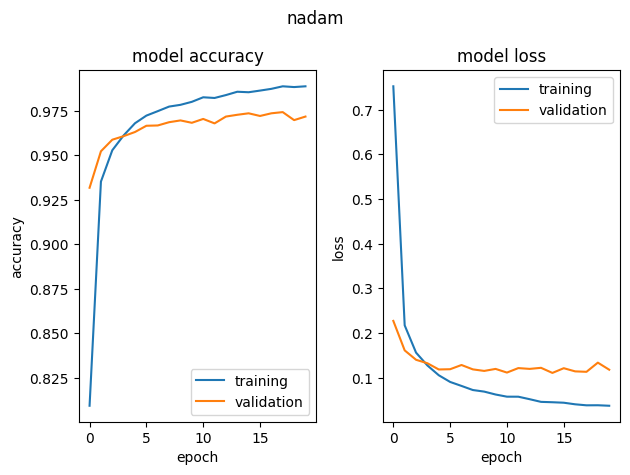

Trained in 17.779213999999968 seconds
Test loss: 0.141
Test accuracy: 0.969


In [7]:
histories = []

for optimizer in optimizers:
    model = fresh_model_2()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

In [8]:
# Again, this should all look familiar
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)


In [9]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

In [10]:
# Most of the literature suggests using different dropout rates for the hidden layers and the
# visible (input) layers. Specifically, people rarely use dropout on the input layer, and if 
# you do the rate should be very small. Large (.3-.5) dropout rates on the hidden layers are
# not uncommon. Lets experiment with different choices for each.

# Here, we are using the model that performed pretty well in the previous exercise
# and adding dropout layers after each hidden layer. 
def model_with_dropout(dropout_rate):
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    
    for _ in range(5):
        model.add(Dense(units=64, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model


dropout_rate: 0.8


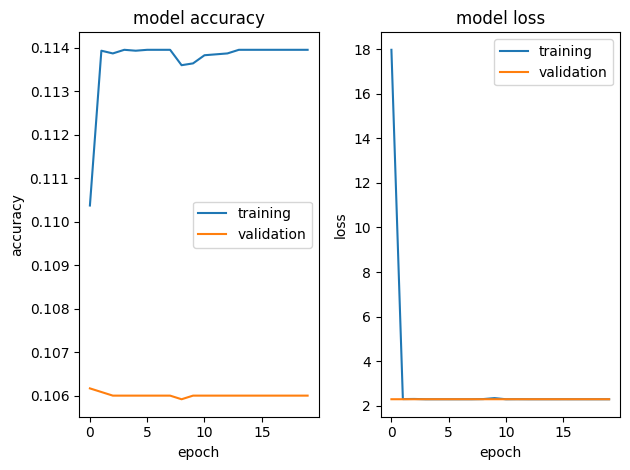

Test loss: 2.3
Test accuracy: 0.113

dropout_rate: 0.5


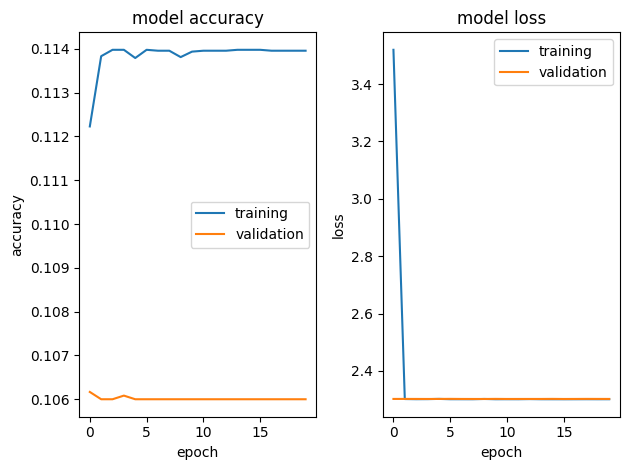

Test loss: 2.3
Test accuracy: 0.113

dropout_rate: 0.3


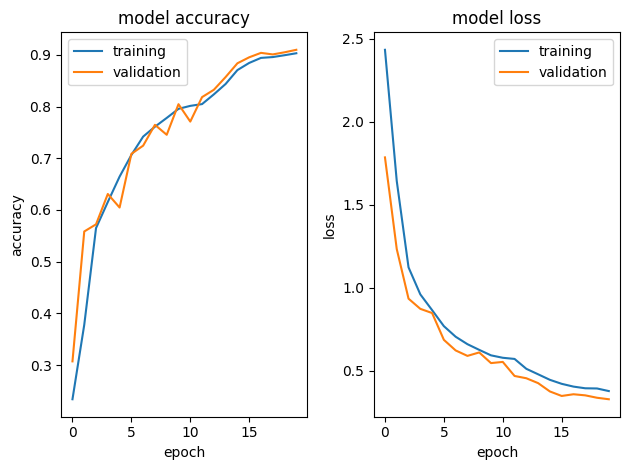

Test loss: 0.34
Test accuracy: 0.907

dropout_rate: 0.2


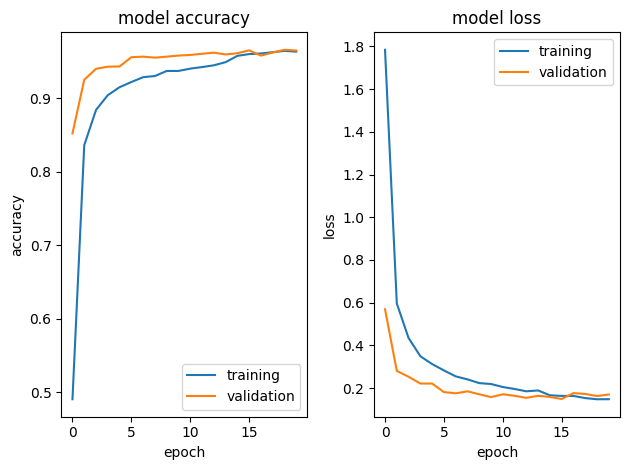

Test loss: 0.187
Test accuracy: 0.962

dropout_rate: 0.1


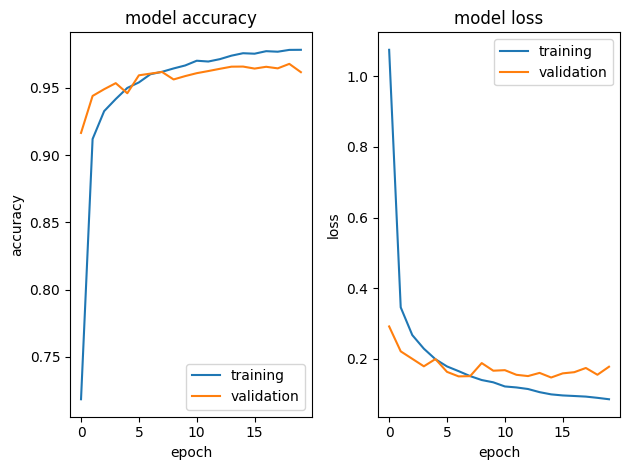

Test loss: 0.172
Test accuracy: 0.965


In [11]:
epochs = 20
batch_size = 32
validation_split = 0.2

dropout_rates = [.8, .5, .3, .2, .1]

for dropout_rate in dropout_rates:
    model = model_with_dropout(dropout_rate)
    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
    print(f'\ndropout_rate: {dropout_rate}')
    plot_training_history(history, model)

In [12]:
# As you can see, using different rates can seriously impact performance.
# With very high rates, our networks have not converged, and results are 
# unstable. At lower rates, training accuracy stays below validation acc.
# and thats good. 

# It's also worth considering dropout only at specific layers
# not just at every layer. The complexity that builds up near
# the end of a network holds a greater risk of contributing to 
# overfitting. Experiment with that too:
def model_with_selective_dropout(dropout_rate, dropout_layers):
    assert dropout_layers <= 5
    
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(mnist_image_size,)))
    
    no_drop_layers = 5 - dropout_layers
    for _ in range(no_drop_layers):
        model.add(Dense(units=64, activation='relu'))
        
    for _ in range(dropout_layers):
        model.add(Dense(units=64, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model

In [ ]:
from itertools import product

epochs = 20
batch_size = 32
validation_split = 0.2

# Note, we didn't get far with .8 or .5, so I removed them for this experiment
# However, in larger networks .8 and .5 may be reasonable choices! Don't over
# generalize the findings that might be specific to this network architecture 
# and this dataset!
dropout_rates = [.3, .2, .1]
dropout_layers = [3, 2, 1]

for dropout_rate, dropout_layers in product(dropout_rates, dropout_layers):
    model = model_with_selective_dropout(dropout_rate, dropout_layers)
    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=batch_size, epochs=epochs, verbose=False, validation_split=validation_split)
    print(f'\ndropout_rate: {dropout_rate} dropout_layers={dropout_layers}')
    plot_training_history(history, model)